In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import healpy as hp

In [3]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin
d2r = np.pi / 180.

In [4]:
nu = np.linspace(100, 1000, 1000) *1e9

In [5]:
X = hplanck * nu / (kboltz * TCMB) 
G = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2

(0.1, 1000)

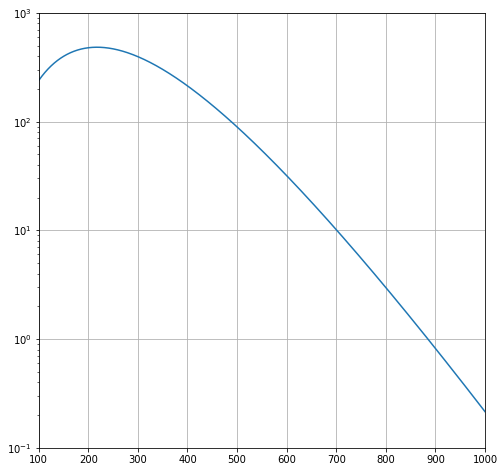

In [6]:
figsize(8,8)
semilogy(nu*1e-9, G*1e26*1e-6)
grid()
xlim(100, 1000)
ylim(0.1, 1000)

In [7]:
lonc = 107.2
latc = 5.2
lonra = [lonc-2., lonc+2.]
latra = [latc-2., latc+2.]

In [8]:
haslam0408 = hp.read_map('../externaldata/lambda_haslam408_dsds.fits', verbose=False)
#haslam0408 = hp.ud_grade(hp.smoothing(haslam0408, fwhm=1.*d2r), 512)

In [9]:
x = np.copy(haslam0408)
nside = hp.get_nside(x)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, 1.*d2r)
amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))

In [10]:
nu = 408.e6
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26
y = x * kthermo_to_intensity
rdata = y[rmask]
adata = y[amask]
print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

21.51760006103533 0.76064909027045


In [11]:
print np.sqrt(np.mean(adata*adata)) * np.sqrt(len(rdata) + pi/2. * len(rdata)**2 / len(adata))
print np.std(adata) * np.sqrt(len(rdata) + (pi/2.) * len(rdata)**2 / len(adata))

23.891559074030525
0.9942791994368728


In [12]:
wmap23 = hp.read_map('../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits', verbose=False) * 1.e-3
x = np.copy(wmap23)
nside = hp.get_nside(x)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, 1.*d2r)
amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))
nu = 22.71e9
X = hplanck * nu / (kboltz * TCMB) 
kcmb_to_kthermo = (np.exp(X) - 1.)**2 / (X**2 * np.exp(X))
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26 
y = x * kcmb_to_kthermo * kthermo_to_intensity
rdata = y[rmask]
adata = y[amask]
print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))
print np.sqrt(np.mean(adata*adata)) * np.sqrt(len(rdata) + pi/2. * len(rdata)**2 / len(adata))
print np.std(adata) * np.sqrt(len(rdata) + (pi/2.) * len(rdata)**2 / len(adata))

39.39439354462503 0.5573091188856107
3.7837525159092484
0.7284842270269928


In [13]:
0.03 * 39

1.17

In [25]:
def planck_calc(planck, nu):
    planckmap = hp.read_map(planck, verbose=False)
    #planckmap = hp.ud_grade(hp.smoothing(planckmap, fwhm=1.*d2r, verbose=False), 512)
    planckmap = hp.smoothing(hp.ud_grade(planckmap, 512), fwhm=1.*d2r, verbose=False)
    x = np.copy(planckmap)
    nside = hp.get_nside(x)
    vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
    rmask = hp.query_disc(nside, vecc, 1.*d2r)
    amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
    amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
    amask = np.array(list(amaskout.difference(amaskin)))
    X = hplanck * nu / (kboltz * TCMB) 
    kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2
    if nu < 400e9:
        y = x * kthermo_to_intensity * hp.nside2pixarea(nside) * 1.e26 
    else:
        y = x * 1e6 * hp.nside2pixarea(nside)
    rdata = y[rmask]
    adata = y[amask]
    print np.sum(rdata - np.median(adata))
    print np.sqrt(np.mean(adata*adata)) * np.sqrt(len(rdata) + pi/2. * len(rdata)**2 / len(adata))
    print np.std(adata) * np.sqrt(len(rdata) + (pi/2.) * len(rdata)**2 / len(adata))

In [ ]:
k = !PI/2.
fd_err = factor * sqrt(float(ninnerpix) + (k * float(ninnerpix)^2/nouterpix)) * robust_sigma(map[outerpix,column])

In [22]:
0.03 * 34

1.02

In [26]:
planck_calc('../externaldata/LFI_SkyMap_030-field-IQU_1024_R2.01_full.fits', nu=28.5e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
34.093812922653186
2.630185067453714
0.6535137621509414


In [27]:
planck_calc('../externaldata/LFI_SkyMap_044-field-IQU_1024_R2.01_full.fits', nu=44.1e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
31.021471724379836
2.2178821616832156
0.633326023881649


In [18]:
planck_calc('../externaldata/LFI_SkyMap_070-field-IQU_1024_R2.01_full.fits', nu=70.3e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
30.841654460058532 2.0981977051675265


In [17]:
planck_calc('../externaldata/HFI_SkyMap_143-field-IQU_2048_R2.02_full.fits', nu=143.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
98.28543446191614 3.9672743699352697


In [18]:
planck_calc('../externaldata/HFI_SkyMap_217-field-IQU_2048_R2.02_full.fits', nu=217.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
464.5898263892891 15.76435485389136


In [19]:
planck_calc('../externaldata/HFI_SkyMap_353-field-IQU_2048_R2.02_full.fits', nu=353.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
1963.3480068325523 64.71523176000684


In [20]:
planck_calc('../externaldata/HFI_SkyMap_545-field-Int_2048_R2.02_full.fits', nu=545.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
6584.776055775203 199.03117217137333


In [21]:
planck_calc('../externaldata/HFI_SkyMap_857-field-Int_2048_R2.02_full.fits', nu=857.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
21576.614453742885 559.2828617319477


In [22]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits', nu=22.71e9)

38.35965385662121 0.5426707449468384


In [23]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Ka_v5.fits', nu=32.95e9)

37.38066469497693 0.517350833879461


In [24]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Q_v5.fits', nu=40.65e9)

34.376646740814266 0.49285905724552836


In [25]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_V_v5.fits', nu=60.64e9)

31.730155670253545 0.6141051266035785


In [26]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_W_v5.fits', nu=93.44e9)

40.413470525833034 1.3278136316387539


In [182]:
def wmap_calc(wmap, nu):
    wmapmap = hp.read_map(wmap, verbose=False) * 1.e-3
    x = np.copy(wmapmap)
    nside = hp.get_nside(x)
    vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
    rmask = hp.query_disc(nside, vecc, 1.*d2r, inclusive=False)
    amaskout = set(hp.query_disc(nside, vecc, 2.*d2r, inclusive=False))
    amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r, inclusive=False))
    amask = np.array(list(amaskout.difference(amaskin)))
    X = hplanck * nu / (kboltz * TCMB) 
    #kcmb_to_kthermo = (np.exp(X) - 1.)**2 / (X**2 * np.exp(X))
    kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2
    y = x * kthermo_to_intensity * hp.nside2pixarea(nside) * 1.e26 
    rdata = y[rmask]
    adata = y[amask]
    #print np.sqrt(np.mean((adata)**2)) * np.sqrt(len(rdata))
    #print np.sqrt( np.mean((adata)**2) * (len(adata) + len(rdata)) ) 
    print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata)) 

In [183]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits', nu=22.71e9)

38.35965385662121 0.5426707449468384


In [184]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Ka_v5.fits', nu=32.95e9)

37.38066469497693 0.517350833879461


In [185]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Q_v5.fits', nu=40.65e9)

34.376646740814266 0.49285905724552836


In [186]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_V_v5.fits', nu=60.64e9)

31.730155670253545 0.6141051266035785


In [187]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_W_v5.fits', nu=93.44e9)

40.413470525833034 1.3278136316387539


In [189]:
lonc = 107.2
latc = 5.2
lonra = [lonc-2.5, lonc+2.5]
latra = [latc-2.5, latc+2.5]

In [233]:
lonc = 005.4
latc = 36.5
lonra = [lonc-3, lonc+3]
latra = [latc-3, latc+3]

In [214]:
x = hp.read_map('../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits')

NSIDE = 512
ORDERING = NESTED in fits file
Ordering converted to RING


In [215]:
planckmap = hp.read_map('../externaldata/LFI_SkyMap_044-field-IQU_1024_R2.01_full.fits')
planckmap = hp.ud_grade(hp.smoothing(planckmap, fwhm=1.*d2r, verbose=False), 512)
#planckmap = hp.smoothing(hp.ud_grade(planckmap, 512), fwhm=1.*d2r)

NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [200]:
planckmap = hp.read_map('../externaldata/HFI_SkyMap_143-field-IQU_2048_R2.02_full.fits')
planckmap = hp.ud_grade(hp.smoothing(planckmap, fwhm=1.*d2r, verbose=False), 512)
#planckmap = hp.smoothing(hp.ud_grade(planckmap, 512), fwhm=1.*d2r)

NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [269]:
x = np.copy(haslam0408)
nside = hp.get_nside(x)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, 1.*d2r)
amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))

In [270]:
nu = 408.e6
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26
y = x * kthermo_to_intensity
rdata = y[rmask]
adata = y[amask]
print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

-3456.4774554428313 209.54062224715162


In [229]:
nu = 408.e6
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26
y = x * kthermo_to_intensity
rdata = y[rmask]
adata = y[amask]
print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

-4.082334718116893 0.18947121112206425


In [243]:
hp.nside2resol(hp.get_nside(haslam0408), arcmin=True)

6.870972823634812

In [246]:
5. * 60 / 1.5

200.0

In [268]:
#haslam0408 = hp.read_map('../externaldata/lambda_haslam408_dsds.fits')
haslam0408 = hp.read_map('../externaldata/lambda_haslam408_nofilt.fits')
#haslam0408 = hp.smoothing(haslam0408, fwhm=1.*d2r)
#haslam0408 = hp.smoothing(hp.ud_grade(haslam0408, 512), fwhm=1.*d2r)

NSIDE = 512
ORDERING = NESTED in fits file
Ordering converted to RING


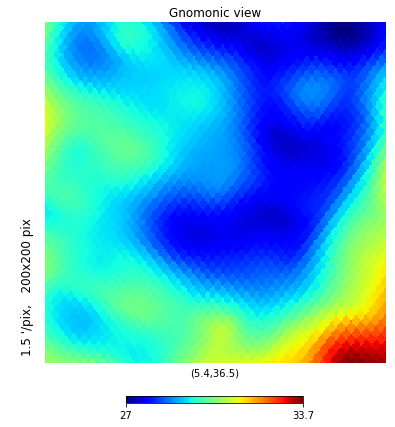

In [261]:
hp.gnomview(haslam0408, rot=(lonc, latc))

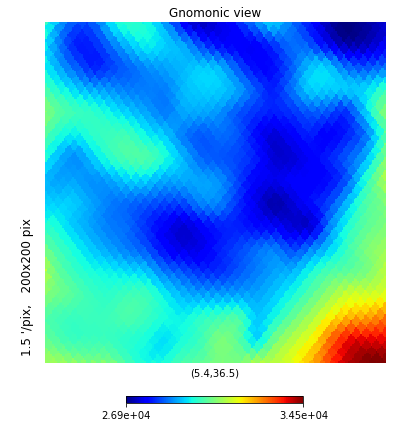

In [265]:
hp.gnomview(haslam0408, rot=(lonc, latc))

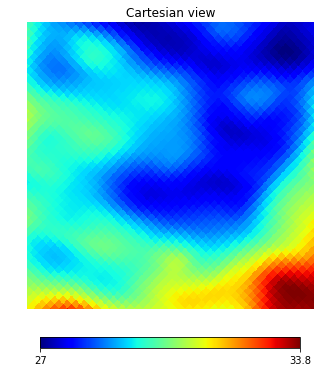

In [234]:
hp.cartview(haslam0408, lonra=lonra, latra=latra, )

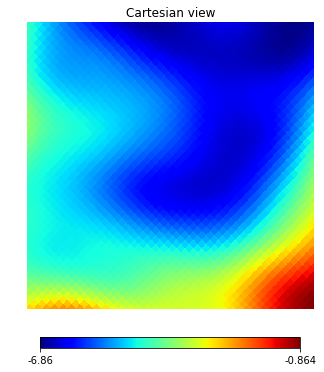

In [236]:
hp.cartview(haslam0408, lonra=lonra, latra=latra)

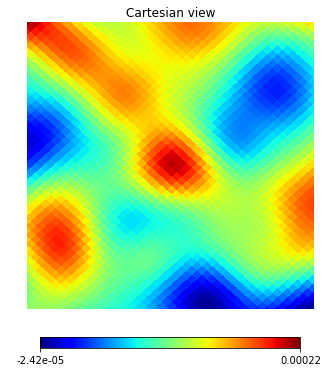

In [201]:
hp.cartview(planckmap, lonra=lonra, latra=latra)

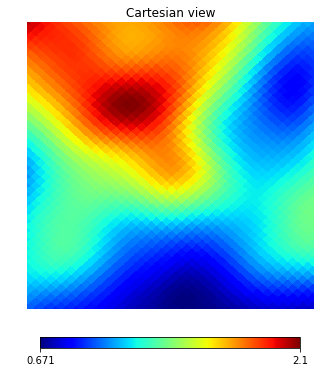

In [193]:
hp.cartview(x, lonra=lonra, latra=latra)